# Telco Project Part I

## Goals:

>- To identify the factors that contribute to customer churn in the Telco dataset.
>- To develop strategies for retaining customers who are at high risk of churning, based on their tenure and other characteristics.
>- To determine whether there are specific payment methods that are associated with higher rates of churn and to develop recommendations for improving retention for customers who use those payment methods.
>- To investigate whether there is a relationship between the customers that have tech support and their likelihood of churning, and to develop strategies for retaining customers who are at high risk of churning based on their tech support service.

## Imports

In [1]:
# Standard imports
import pandas as pd
import numpy as np

# Graph imports
import matplotlib.pyplot as plt
import seaborn as sns


# SKLearn imports
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#import this for the decision tree!
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.tree import plot_tree

# Import to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Stats import
import scipy.stats as stats
from scipy.stats import chi2_contingency

# My imports
import wrangle as w
import prepare as p
import acquire as a
import model as m
import explore as e

### Acquire

>- Got the data from a telco company's database in MySQL.
>- The dataset has information on 7,043 customers and 24 different features, including personal information and details about the services they're using.
>- The data types include floats, integers, and objects.
>- Each row in the dataset represents a single customer.
>- Each column in the dataset represents a specific feature of the customer or their services.

### Prepare

>- Prepared the data by applying a series of transformations using a custom functions defined in the prepare file. The function removed unnecessary columns, added new columns as needed, and renamed some of the columns for clarity.

>- Also performed some data cleaning steps to ensure the quality of the dataset. Specifically, checked for missing values and duplicates, but found none.

>- To make the dataset more consistent, I standardized the column names by replacing spaces with underscores and converting all text to lowercase.

>- Replaced nulls with zeros. 

In [2]:
# Get your telco data
telco_df = a.get_telco_data()

# acquire the data dictionary
data_dictionary = w.data_dictionary(telco_df)

csv file found and loaded


features,definition
payment_type_id,Payment type ID
internet_service_type_id,Internet service type ID
contract_type_id,Contract type ID
customer_id,Customer ID
gender,Whether the customer is a male or a female
senior_citizen,Whether the customer is a senior citizen or not
partner,Whether the customer has a partner or not
dependents,Whether the customer has dependents or not
tenure,Number of months the customer has stayed with the company
phone_service,Whether the customer has a phone service or not


In [3]:
# Clean the new dataset using the new function called prep_telco
telco_df = p.prep_telco(telco_df)

# Split your data into train, validate and test
train, validate, test = p.split_function(telco_df, 'churn')

### Take a look at the data

In [4]:
# Pull only the five first rows of the data
train.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,payment_type,gender_male,partner_yes,dependents_yes,phone_service_yes,...,streaming_movies_yes,paperless_billing_yes,churn,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_(automatic),payment_type_electronic_check,payment_type_mailed_check
5310,7503-MIOGA,1,72,89.85,6697.35,Bank transfer (automatic),0,1,0,1,...,1,1,0,0,1,0,0,0,0,0
3790,5329-KRDTM,1,72,77.35,5396.25,Credit card (automatic),1,1,0,1,...,0,0,0,0,1,0,0,1,0,0
4398,6199-IWKGC,1,46,100.25,4753.85,Electronic check,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
2635,3748-FVMZZ,0,4,40.05,162.45,Electronic check,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
2986,4280-DLSHD,0,8,54.75,445.85,Mailed check,1,1,0,1,...,0,1,0,0,0,0,0,0,0,1


### Description of the Data

In [5]:
# Describe the train data
train.describe()

,senior_citizen,tenure,monthly_charges,total_charges,gender_male,partner_yes,dependents_yes,phone_service_yes,multiple_lines_no_phone_service,multiple_lines_yes,...,streaming_movies_yes,paperless_billing_yes,churn,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_(automatic),payment_type_electronic_check,payment_type_mailed_check
count,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,...,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000
mean,0.162820,32.473244,65.328937,2310.297451,0.509003,0.486685,0.307634,0.907431,0.092569,0.430383,...,0.396906,0.594725,0.265280,0.215318,0.234339,0.442556,0.215318,0.219376,0.336799,0.222419
std,0.369248,24.551176,30.261023,2282.121687,0.499982,0.499886,0.461573,0.289864,0.289864,0.495193,...,0.489318,0.491007,0.441538,0.411095,0.423639,0.496752,0.411095,0.413876,0.472676,0.415924
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.900000,413.125000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.550000,1404.650000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,90.250000,3910.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8672.450000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Explore

#### 1. Is there a significan difference between gender and churn?

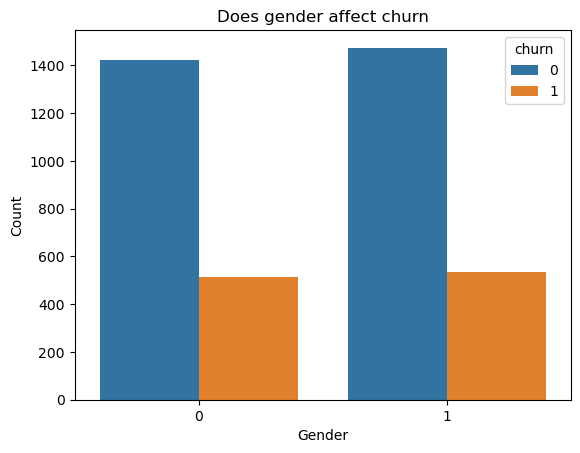

In [6]:
# the gender vs churn 
e.get_q_one_countplot2(train)

>- Females and Males are leaving at the same rate.

In [7]:
e.get_q_three_demographic_group(train).head(2)

,gender_male,senior_citizen,partner_yes,dependents_yes,total_customers,churn_ratio
8,1,0,0,0,131,21.9%
0,0,0,0,0,123,20.6%


>- Customers (male or female) that are not senior citizens with no partners or dependents have the highest churn rate.

#### 2. How does tenure relate to customer churn?

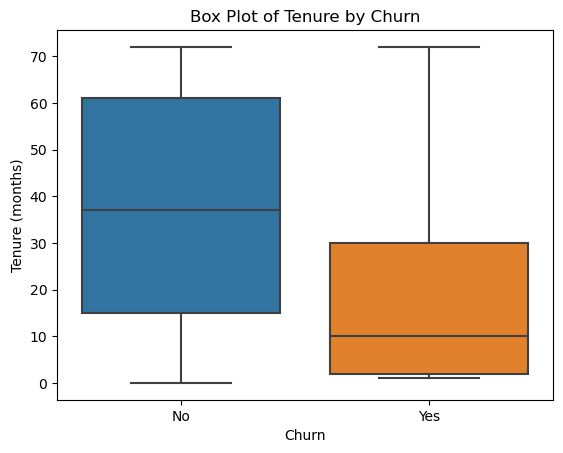

In [8]:
# This Box plot shows the relationship between the tenure and customer churn. 
e.get_q_two(train)

# T-test

         $H_{0}$ : There is no relationship between customers tenure and churn .

         $H_{a}$ : There is a relationship between customers tenure and churn.

In [9]:
# A t-test is used to evaluate the significant difference in the mean tenure
# between customers who churn vs those who don't churn.
e.get_q_two_t_test(train)

p-value 2.526007622614454e-111
We reject the null hypothesis
.


>- Customers with shorter tenure are more likely to churn than those with longer tenure.
>- The company should focus on improving customer retention efforts for customers with shorter tenure.

#### 3. Is there a relationship between the payment method and churn?

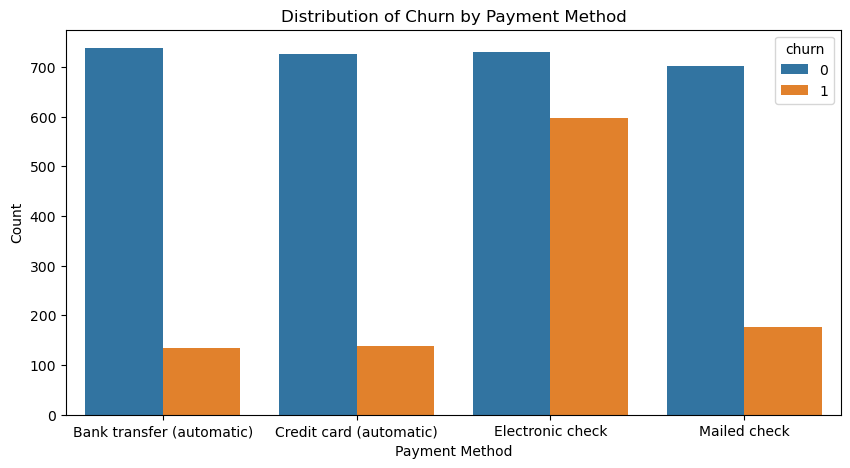

In [10]:
e.get_q_three_figure(train)

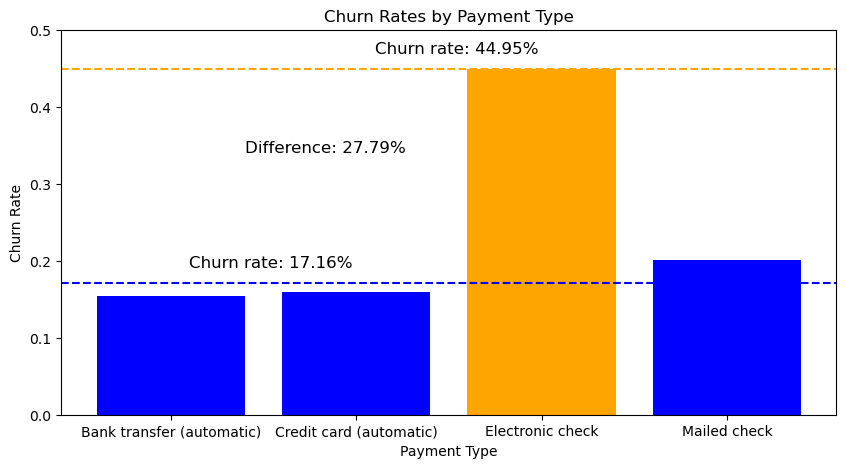

In [11]:
e.get_q_three_churn_rates(train)

>- Customers who use electronic checks as their payment method are more likely to churn than customers using other payment methods.
>- Electronic check payment method has the highest churn rate, while the credit card payment method has the lowest churn rate.
>- The electronic check payment method has a churn rate of 44.95%, while the churn rate difference between the other payment methods is 27.79%.

# Chi2 test

         $H_{0}$ : There is not a relationship between payment method and churn.

         $H_{a}$ : There is a relationship between payment method and churn.

In [12]:
# Get the chi2 result for question 3
e.get_q_three_chi2(train)

p-value 1.5202665381285794e-76
We reject the null hypothesis



>- The chi-squared test confirms that the relationship between the payment method and churn is statistically significant.

#### 4. Do customers with tech support churn less often than those without tech support?

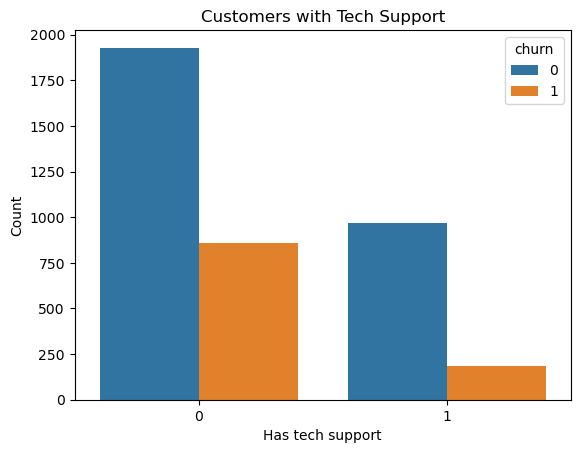

In [13]:
e.get_q_four_countplot(train)

# Chi2 test

     $H_{0}$ : churn is not affected by tech support.

     $H_{a}$ : churn is affected by tech support.

In [14]:
e.get_q_four_chi2(train)

p-value 4.338232148650809e-21
We reject the null hypothesis
.


>- Customers with tech support tend to churn less often than those without tech support.
>- Having tech support is associated with a lower churn rate.

### Exploration Summary
During the exploration section, I analyzed the Telco Customer Churn dataset to understand the relationships between customer churn and various features. Here are my key findings:

>- The dataset contains 7,043 observations and 23 columns.
>- The dataset is has 73% of customers unchurn and 27% of customers churning.
>- The features that are strongly associated with churn are: gender_male, tenure, and payment type.
>- Customers with shorter tenure are more likely to churn.
>- Customers with tech support are less likely to churn than those without.


Based on these findings, I have decided to include the following features in my modeling:

>- gender_male
>- tenure
>- payment_type
>- has_tech_support

## Modeling

>- Decision Tree:
>- Random Forest:
>- Logistic Regression:

In [15]:
# Lets drop columns that are objects and don't add any value to the data. Also, we need to remove the 'churn_Yes' column because is our TARGET.
# Also, lets convert train to X_train.
X_train, X_validate, X_test, y_train, y_validate, y_test = m.get_Xs_ys(train, validate, test)

#### Decision Tree Model

In [16]:
# Dataframe comparancen between several max depths to find the best max depth
m.get_dt_score(train, X_train, y_train, X_validate, y_validate, X_test, y_test)

Baseline: 0.7347197565305605
train data prediction: 0.8244991123510018
validation data prediction: 0.7953873447664104
unseen data prediction: 0.7785663591199432


>- The model with the max depth of 6 is the ideal one and it performs better than the baseline. 

#### Random Forest Model Type

In [17]:
m.get_rf_train_val_acc(train, X_train, y_train, X_validate, y_validate)

Baseline: 0.7347197565305605
train data prediction: 0.7547552624904895
validation data prediction: 0.7545830869308102


>- The model that has a max depth of 2 with min samples leaf 9 is the best model to use.

#### Logistic Regression Model Type

In [18]:
# Baseline accuracy
# Logit train and validate data prediction
m.get_logit_score(train, X_train, y_train, X_validate, y_validate)

Baseline: 0.7347197565305605
train data prediction: 0.751965508496069
validation data prediction: 0.7616794795978711


>- The logistic Regression model performs better than the baseline using the hyperparameter class weight = 'balanced'.

>- The Decission Tree Model performs better than the other models.

## Conclusion

Based on the exploration and modeling performed, it appears that the Decission Tree Classifier was the most effective model for predicting customer churn for the given Telco customer dataset. The accuracy score achieved by the Decission Tree Classifier was 82%, indicating that the model was able to correctly identify a significant portion of the true positives and true negative. 

During the exploration phase, several features were identified as being the most significant predictors of customer churn. These features included tenure, payment method, and tech support. Customers with shorter tenure lengths, without tech support, and electronic check as their payment method were more likely to churn.

### Recommendations

Based on the findings, it is recommended that the company focus on retaining customers with shorter tenure lengths and payment methods. Offering incentives such as loyalty rewards or discounts for customers who sign longer contracts or use electronic payment methods could also help reduce churn.

### Next Steps

Next steps could include further exploration of feature engineering and selection, as well as testing additional models. It may also be useful to gather additional data, such as customer satisfaction ratings or competitor analysis, to gain a more comprehensive understanding of the factors that influence customer churn in this market.

The company should also examine the factors that contribute to longer tenure for customers who do not churn in order to replicate those successes for other customers.

## Predictions (.csv)

In [20]:
# Customer prediction churn utilizing the random forest model
rf = m.get_rf(X_train, y_train)
predictions_df = w.get_predictions_df(rf,X_test,test)
predictions_df

,customer_id,probability_of_churn,prediction_of_churn
0,4531-AUZNK,0.15,not_churn
1,2296-DKZFP,0.05,not_churn
2,9692-TUSXH,0.46,not_churn
3,5129-JLPIS,0.46,not_churn
4,1273-MTETI,0.89,churn
...,...,...,...
1404,1597-FZREH,0.40,not_churn
1405,9117-SHLZX,0.68,churn
1406,8441-SHIPE,0.00,not_churn
1407,3511-BFTJW,0.02,not_churn
